# Steps Involved in Time Series:
1.visualize a Time Series Model for Checking Trends,Seasonality or random Pattern <br>
2.Stationarize the Series using decomposition or Differencing  technique<br>
3.plot acf/pacf for finding pdq parameter<br>
4.Build an ARIMA Model<br>
5.Make Prediction using Final ARIMA model<br>

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
appleData = pd.read_csv('apple.csv',index_col=[0],parse_dates=True)

In [3]:
type(appleData)

pandas.core.frame.DataFrame

In [4]:
appleData.index

DatetimeIndex(['2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-12',
               ...
               '2019-12-12', '2019-12-13', '2019-12-16', '2019-12-17',
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-26'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [5]:
appleData.shape

(1258, 6)

In [6]:
appleData.head(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-29,114.769997,113.699997,113.790001,113.910004,27598900.0,104.662506
2014-12-30,113.919998,112.110001,113.639999,112.519997,29881500.0,103.385315
2014-12-31,113.129997,110.209999,112.820000,110.379997,41403400.0,101.419060
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,100.454300


In [7]:
appleData.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,284.269989
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,289.910004


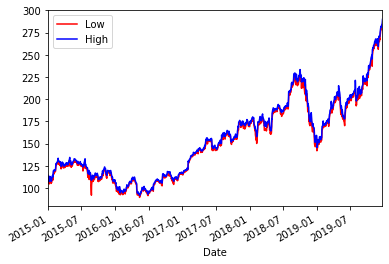

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot()
appleData.plot(y='Low',color='red',ax=ax1)
appleData.plot(y='High',color='blue',ax=ax1)

In [9]:
appleData.head(2)
test_data=appleData.head(4)
test_data.loc['2014-12-29','Close']=100
test_data.loc['2014-12-30','Close']=80
test_data.loc['2014-12-31','Close']=100
test_data.loc['2015-01-02','Close']=110
test_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-29,114.769997,113.699997,113.790001,100.0,27598900.0,104.662506
2014-12-30,113.919998,112.110001,113.639999,80.0,29881500.0,103.385315
2014-12-31,113.129997,110.209999,112.820000,100.0,41403400.0,101.419060
2015-01-02,111.440002,107.349998,111.389999,110.0,53204600.0,100.454300


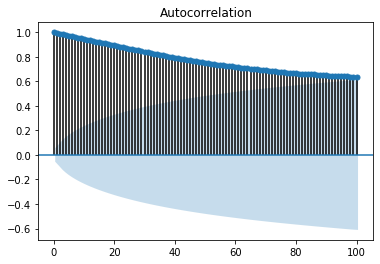

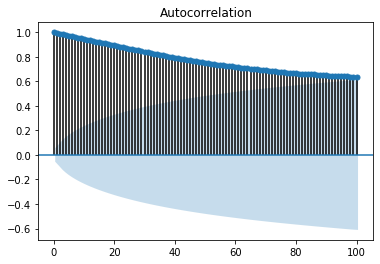

In [11]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(appleData.Close,lags=100)

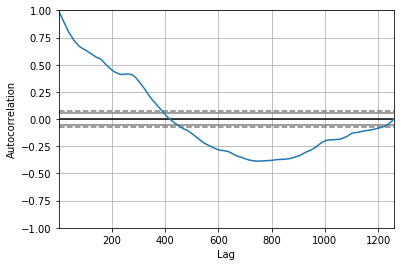

In [25]:
pd.plotting.autocorrelation_plot(appleData.Close)

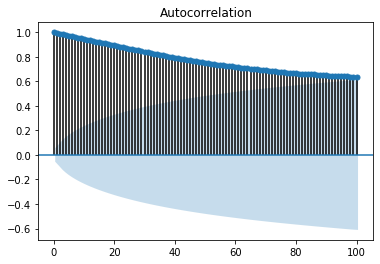

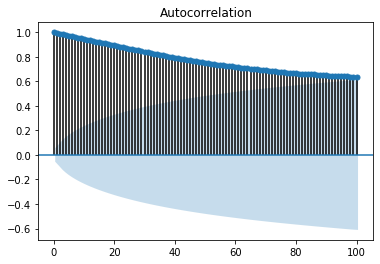

In [12]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(appleData.Close,lags=100)

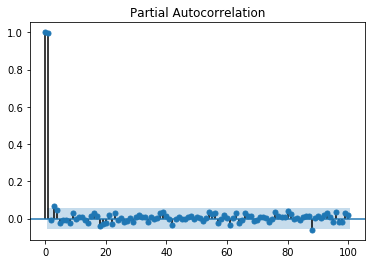

In [13]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(appleData.Close,lags=100)
pyplot.show()

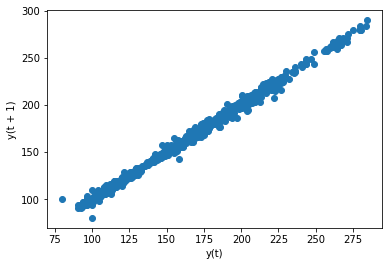

In [14]:
from pandas.plotting import lag_plot
lag_plot(appleData.Close)
plt.show()

In [15]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
X = appleData.Close.values
train, test = X[1:len(X)-10], X[len(X)-10:]
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 23
Coefficients: [ 0.06198225  1.01047732 -0.07881139  0.04032387  0.05686713 -0.00111493
 -0.01530269  0.07579653 -0.12904257  0.09096156 -0.0566543   0.00436
  0.01867012 -0.03998047  0.04816956 -0.06141058  0.06159907  0.0452078
 -0.05361272  0.01324189 -0.01024442  0.00375114 -0.04753318  0.0245164 ]


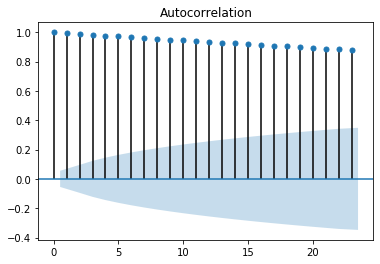

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(appleData.Close,lags = 23)
plt.show()

# making Prediction:

predicted=271.092055, expected=271.459991
predicted=271.240125, expected=275.149994
predicted=271.279735, expected=279.859985
predicted=271.561988, expected=280.410004
predicted=271.471043, expected=279.739990
predicted=272.104669, expected=280.019989
predicted=272.180052, expected=279.440002
predicted=272.689135, expected=284.000000
predicted=273.129252, expected=284.269989
predicted=272.896798, expected=289.910004
Test MSE: 89.257


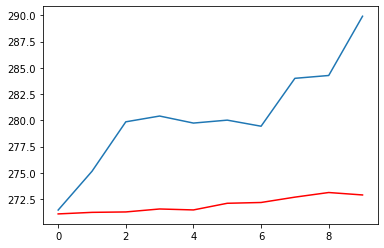

In [17]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Centered Moving Average Properties
This method requires the know how of the future values to calculate the average.

1).This technique is used for detrending and removing any seasonal effects on Time Series Data. <br>
2).This is not very useful for forecasting.

# Trailing Moving Average 
uses historical observations for determining the future observation.

**trail_moving_average(t) = average(obs(t-2), obs(t-1), obs(t))**

Moving Average can be used for prediction<br>
It is not a very effective way to predict but can still be used to get a naive estimate<br>
The assumption we make is that the trend and seasonal components are nullified<br>
This can be used in a Walk Forward Manner

In [18]:
from pandas import Series
seriesData = Series(appleData.Close.values)
rolling = seriesData.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.head(10)

0           NaN
1           NaN
2     93.333333
3     96.666667
4    105.416667
5    107.503334
6    106.753334
7    108.633334
8    110.550001
9    111.050001
dtype: float64

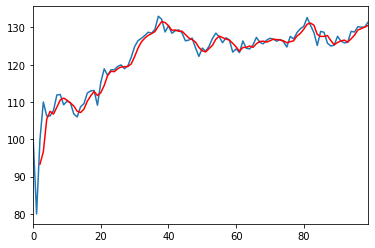

In [19]:
#Plotting the moving average
seriesData.head(100).plot()

rolling_mean.head(100).plot(color='red')

plt.show()

# Prediction using Python moving average

In [20]:
from numpy import mean
X = appleData.Close.values
window = 3
history = [X[i] for i in range(window)]
print(history)
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test

for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)

#	print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


[100.0, 80.0, 100.0]
Test MSE: 9.808


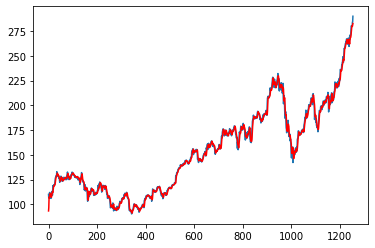

In [21]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

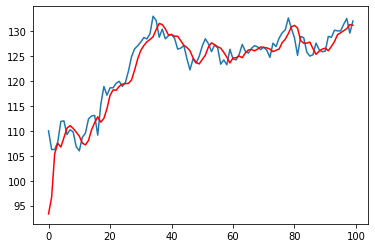

In [22]:
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()

# ARMA
**Box Jenkins - Identification**
    This is the First Step in the process <br>
    Check if the Time series is Stationary or Not<br>
    Get the parameters for ARMA model<br>

**Stationarity Check**

Differencing<br>
Unit Root Method<br>
Configuring AR and MA<br>

ACF and PACF plot will help in getting the p and q values for the model<br>

Some Observable Patterns:<br>

If the ACF is trailing after a particular lag value and shows a very hard cut-off in PACF after a specific lag value ,
the process is AR. Value of p is the lag value

If the the PACF is trailing off after a specific lag value and is having a very hard cut-off in the ACF
after a particular lag value , the model is MA . Value of q is the lag value.

# ARIMA
ARIMA stands for Auto Regressive Integrated Moving Average:

**AR:** Autoregression. Model that uses the past values to predict the future values <br>
**I:** Integrated. Making use of difference to make the data stationary <br>
**MA:** Moving Average.A model that makes use of historical observations from a moving average model <br>

The standard representation of an **ARIMA** model is **ARIMA(p,d,q)**

**p** the number of lag observations also called as lag order.<br>
**d** number of observations that are differenced, degree of difference.<br>
**q** order of moving average or the size of the moving average window.<br>

In [23]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
appleCloseTs = appleData.Close
X = appleCloseTs.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

Test MSE: 11.773


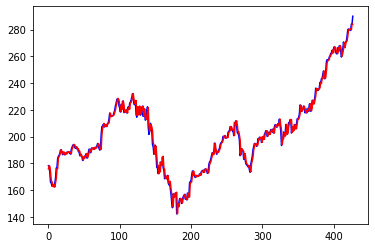

In [24]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test, color='blue')
plt.plot(predictions, color='red')
plt.show()

# VAR

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

import statsmodels.api as sm

from statsmodels.tsa.api import VAR, DynamicVAR

mdata = sm.datasets.macrodata.load_pandas().data
dates = mdata[['year', 'quarter']].astype(int).astype(str)

quarterly = dates["year"] + "Q" + dates["quarter"]

from statsmodels.tsa.base.datetools import dates_from_str

quarterly = dates_from_str(quarterly)

mdata = mdata[['realgdp','realcons','realinv']]

mdata.index = pandas.DatetimeIndex(quarterly)

data = np.log(mdata).diff().dropna()

model = VAR(data)

results = model.fit(2)

results.summary()

C:\Users\santa_000\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 31, Dec, 2019
Time:                     10:18:21
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

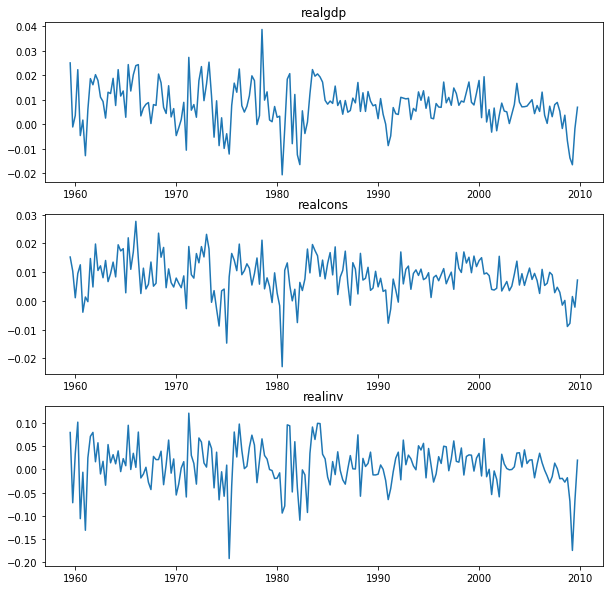

In [4]:
results.plot()

plt.show()

In [5]:
lag_order = results.k_ar

results.forecast(data.values[-lag_order:], 5)

array([[ 0.00502587,  0.0053712 ,  0.0051154 ],
       [ 0.00593683,  0.00784779, -0.00302473],
       [ 0.00662889,  0.00764349,  0.00393308],
       [ 0.00731516,  0.00797044,  0.00657495],
       [ 0.00732726,  0.00808811,  0.00649793]])

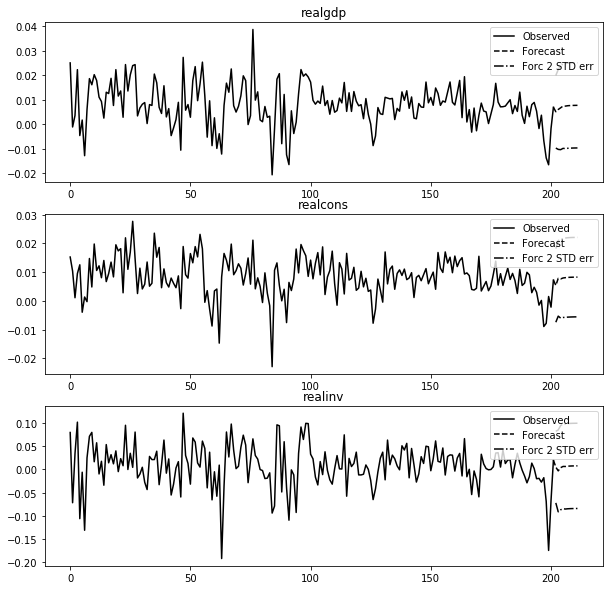

In [6]:
results.plot_forecast(10)

plt.show()

# Smoothing using python: 
<br>
Significance of Exponential Smoothing<br>
Helps in smoothing all the noise from the time series<br>

For different alpha values , the smoothing will differ<br>

Higher values recreate the time series with some smoothing<br>

Forecasts only one value at a time<br>

The process described can be extended to predict multiple values<br>

Depending on the trend of the time series either additive or multiplicative , the process of smoothing differs<br>

All these process are collectively called Holt-Winters Method<br>

In [11]:
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import Series 
timeSeries = [30,21,29,31,40,48,53,47,37,39,31,29,17,9,20,24,27,35,41,38,

          27,31,27,26,21,13,21,18,33,35,40,36,22,24,21,20,17,14,17,19,

          26,29,40,31,20,24,18,26,17,9,17,21,28,32,46,33,23,28,22,27,

          18,8,17,21,31,34,44,38,31,30,26,32]

ts = Series(timeSeries)

In [12]:
def exp_smth(ts, alpha):

    result = [ts[0]] # first value is same as series

    for n in range(1, len(ts)):

        result.append(alpha * ts[n] + (1 - alpha) * result[n-1])

    return result

In [13]:
exp_smth(ts,0.9)

[30,
 21.900000000000002,
 28.290000000000003,
 30.729000000000003,
 39.0729,
 47.10729,
 52.410729,
 47.5410729,
 38.054107290000005,
 38.905410729,
 31.7905410729,
 29.27905410729,
 18.227905410729,
 9.9227905410729,
 18.99227905410729,
 23.49922790541073,
 26.649922790541073,
 34.164992279054104,
 40.31649922790541,
 38.231649922790545,
 28.123164992279055,
 30.712316499227907,
 27.37123164992279,
 26.137123164992282,
 21.51371231649923,
 13.851371231649924,
 20.285137123164994,
 18.2285137123165,
 31.52285137123165,
 34.652285137123165,
 39.46522851371232,
 36.34652285137123,
 23.434652285137123,
 23.943465228513713,
 21.294346522851374,
 20.129434652285138,
 17.312943465228514,
 14.331294346522851,
 16.733129434652284,
 18.77331294346523,
 25.277331294346524,
 28.627733129434652,
 38.86277331294347,
 31.786277331294347,
 21.178627733129435,
 23.717862773312945,
 18.57178627733129,
 25.257178627733133,
 17.825717862773313,
 9.88257178627733,
 16.288257178627735,
 20.528825717862777